In [1]:
# Dependencies
import requests
import os
import gmaps
import datetime 
import pandas as pd
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

from config import weather_key

In [3]:
# Import cities to check pollution values
big_city_df = pd.read_csv("Resources/big_city.csv")
small_city_df = pd.read_csv("Resources/small_city.csv")
high_rate_df = pd.read_csv("Resources/high_rate.csv")
low_rate_df = pd.read_csv("Resources/low_rate.csv")

cities_to_check_df = big_city_df
cities_to_check_df = cities_to_check_df.append(small_city_df, ignore_index=True)
cities_to_check_df = cities_to_check_df.append(high_rate_df, ignore_index=True)
cities_to_check_df = cities_to_check_df.append(low_rate_df, ignore_index=True)

cities_to_check_df

,City,Population,Public Transportation Rate,Median Age,Lat,Lng
0,Brooklyn,2480847.0,61.840460,34.694286,40.678178,-73.944158
1,Chicago,2309901.0,26.096482,34.290000,41.878114,-87.629798
2,Houston,1758164.0,2.762716,32.227907,29.760427,-95.369803
3,Las Vegas,1235945.0,4.647077,36.455172,36.169941,-115.139830
4,Los Angeles,1019978.0,12.176151,32.657143,34.052234,-118.243685
...,...,...,...,...,...,...
285,Lawrenceville,236710.0,0.979575,34.475000,40.301637,-74.736101
286,Suwanee,70891.0,0.980790,36.900000,34.051490,-84.071300
287,Del Sur,71313.0,0.981277,35.800000,38.909479,-77.045610
288,Overland Park,62517.0,0.995605,37.350000,38.982228,-94.670792


In [5]:
collected_measurements_df = pd.DataFrame()

base_url = "http://api.openweathermap.org/data/2.5/air_pollution/history?"

# January 1, 2021
startDate = pd.Timestamp('2021-01-01T12').timestamp()
# January 31, 2021
endDate = pd.Timestamp('2021-01-31T12').timestamp()

# Create series to convert data type
ser = pd.Series([startDate, endDate], dtype='int32')

# Put converted dates into variable to use
startDate = ser[0]
endDate = ser[1]

for index, row in cities_to_check_df.iterrows():
    
    lat = cities_to_check_df.loc[index, "Lat"]
    lng = cities_to_check_df.loc[index, "Lng"]
    city = cities_to_check_df.loc[index, "City"]
    ptr = cities_to_check_df.loc[index, "Public Transportation Rate"]
    medAge = cities_to_check_df.loc[index, "Median Age"]
    population = cities_to_check_df.loc[index, "Population"]
    
    # The parameter piece of the URL
    param_url = f'lat={lat}&lon={lng}&start={startDate}&end={endDate}&appid={weather_key}'

    try:
        # Add parameters to query and convert to json
        response = requests.get(base_url + param_url)
        measurement_data = response.json()
    
        # Create a dataframe out of the result
        measurements_df = pd.DataFrame(measurement_data["list"])
        print(f'Checking on {city}')
    
    #print and move on
    except:
        print(f'Error in JSON pull for {city}')
    
    #Date and measurement conversion processing
    for index, row in measurements_df.iterrows():
    
        # Capture and convert data from UNIX time
        currentDate = measurements_df.loc[index, "dt"]
        currentDate = pd.Timestamp(currentDate, unit='s')
    
        # Capture singular AQI
        main = measurements_df.loc[index, "main"]
        aqi = main["aqi"]
    
        # Capture components breakdown
        components = measurements_df.loc[index, "components"]
        co = components["co"]
        no = components["no"]
        no2 = components["no2"]
        o3 = components["o3"]
        so2 = components["so2"]
        pm2_5 = components["pm2_5"]
        pm10 = components["pm10"]
        nh3 = components["nh3"]
    
        # Captured data to new dataframe columns
        measurements_df.loc[index, "datetime"] = currentDate
    
        measurements_df.loc[index, "co"] = co
        measurements_df.loc[index, "no"] = no
        measurements_df.loc[index, "no2"] = no2
        measurements_df.loc[index, "o3"] = o3
        measurements_df.loc[index, "so2"] = so2
        measurements_df.loc[index, "pm2_5"] = pm2_5
        measurements_df.loc[index, "pm10"] = pm10
        measurements_df.loc[index, "nh3"] = nh3
        
        measurements_df.loc[index, "aqi"] = aqi
    
    measurements_df = measurements_df.drop(columns=['main','components','dt'])
    measurements_df.loc[:,"City"] = city
    measurements_df.loc[:,"Public Transportation Rate"] = ptr
    measurements_df.loc[:,"Median Age"] = medAge
    measurements_df.loc[:,"Population"] = population
    
    collected_measurements_df = collected_measurements_df.append(measurements_df, ignore_index=True)
    #break

collected_measurements_df

Checking on Brooklyn
Checking on Chicago
Checking on Houston
Checking on Las Vegas
Checking on Los Angeles
Checking on Manhattan
Checking on Miami
Checking on Philadelphia
Checking on San Antonio
Checking on San Diego
Checking on Artesia
Checking on East Lansing
Checking on CRYSTAL CITY
Checking on Yardley
Checking on Fort Washington
Checking on DORCHESTR CTR
Checking on Peabody
Checking on Marshfield
Checking on Somerset
Checking on Belmont
Checking on Hoboken
Checking on Glendora
Checking on Oregon City
Checking on Denton
Checking on Southeast Washington
Checking on Christiana
Checking on Cathedral City
Checking on Kaneohe
Checking on Lombard
Checking on Rancho Cordova
Checking on Lithonia
Checking on Revere
Checking on Issaquah
Checking on Syracuse
Checking on Placentia
Checking on Kailua
Checking on Eagle Mountain
Checking on Santa Monica
Checking on E RNCHO DMNGZ
Checking on Bolingbrook
Checking on Union
Checking on Mill Creek
Checking on Romansville
Checking on Oxford
Checking on

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
0,2021-01-31 12:00:00,781.06,38.89,87.74,0.09,23.60,35.14,45.48,10.89,4.0,Brooklyn,61.840460,34.694286,2480847.0
1,2021-01-31 11:00:00,534.06,5.87,78.14,4.47,20.98,18.22,24.25,6.33,2.0,Brooklyn,61.840460,34.694286,2480847.0
2,2021-01-31 10:00:00,460.63,1.36,67.86,13.23,20.03,13.65,18.51,5.07,2.0,Brooklyn,61.840460,34.694286,2480847.0
3,2021-01-31 09:00:00,447.27,0.83,63.75,15.38,19.07,12.76,17.30,4.75,2.0,Brooklyn,61.840460,34.694286,2480847.0
4,2021-01-31 08:00:00,447.27,0.82,61.69,15.02,17.17,12.64,16.99,4.69,2.0,Brooklyn,61.840460,34.694286,2480847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202125,2021-01-01 16:00:00,253.68,0.13,7.28,32.19,0.78,2.13,2.45,0.27,1.0,Matthews,0.998507,40.050000,72164.0
202126,2021-01-01 15:00:00,263.69,0.09,8.23,28.25,0.78,2.31,2.62,0.28,1.0,Matthews,0.998507,40.050000,72164.0
202127,2021-01-01 14:00:00,277.04,0.12,9.85,21.82,0.85,2.61,2.91,0.29,1.0,Matthews,0.998507,40.050000,72164.0
202128,2021-01-01 13:00:00,283.72,0.28,10.37,13.41,0.89,3.20,3.48,0.25,1.0,Matthews,0.998507,40.050000,72164.0


In [22]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = round(collected_measurements_df.groupby(["City"]).agg({'aqi':['mean','median','var','std','sem']}),2)
summary_df

aqi                         
                  mean median   var   std   sem
City                                           
Abilene           1.44    1.0  0.38  0.62  0.02
Aguadilla Pueblo  1.14    1.0  0.12  0.35  0.01
Alpharetta        1.28    1.0  0.26  0.51  0.02
Altoona           1.21    1.0  0.21  0.45  0.02
Ames              1.46    1.0  0.50  0.71  0.03
...                ...    ...   ...   ...   ...
Woodside          1.43    1.0  0.51  0.72  0.03
Woodville         1.18    1.0  0.15  0.39  0.01
Yardley           1.68    1.0  1.18  1.09  0.04
Youngstown        1.28    1.0  0.25  0.50  0.02
Yuma              1.83    2.0  0.71  0.84  0.03

[282 rows x 5 columns]

In [7]:
# Collected measurements to CSV
collected_measurements_df.to_csv("Resources/Collected_Pollution_Measurements.csv", encoding="utf-8", index=False)

In [14]:
summary_df.to_csv("Resources/StatSummary.csv", encoding="utf-8", index=True)

In [38]:
readSummary_df = pd.read_csv("Resources/StatSummary.csv")
readSummary_df = readSummary_df.sort_values(by='aqi', ascending=False)
readSummary_df.head(20)

,Unnamed: 0,aqi,aqi.1,aqi.2,aqi.3,aqi.4
0,NaN,mean,median,var,std,sem
149,Los Angeles,3.84,4.0,1.9,1.38,0.05
70,E RNCHO DMNGZ,3.65,4.0,1.98,1.41,0.05
231,Santa Monica,3.6,4.0,2.16,1.47,0.06
12,Artesia,3.57,4.0,2.13,1.46,0.06
107,Hacienda Heights,3.52,4.0,1.95,1.4,0.05
199,Palos Verdes Peninsula,3.4,4.0,2.16,1.47,0.06
106,HUNTINGTN BCH,3.23,4.0,2.26,1.5,0.06
207,Placentia,2.94,3.0,2.25,1.5,0.06
229,San Diego,2.77,2.0,1.92,1.39,0.05


In [3]:
total_measurements_df = pd.read_csv("Resources\Collected_Pollution_Measurements.csv")
total_measurements_df

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
0,2021-01-31 12:00:00,781.06,38.89,87.74,0.09,23.60,35.14,45.48,10.89,4.0,Brooklyn,61.840460,34.694286,2480847.0
1,2021-01-31 11:00:00,534.06,5.87,78.14,4.47,20.98,18.22,24.25,6.33,2.0,Brooklyn,61.840460,34.694286,2480847.0
2,2021-01-31 10:00:00,460.63,1.36,67.86,13.23,20.03,13.65,18.51,5.07,2.0,Brooklyn,61.840460,34.694286,2480847.0
3,2021-01-31 09:00:00,447.27,0.83,63.75,15.38,19.07,12.76,17.30,4.75,2.0,Brooklyn,61.840460,34.694286,2480847.0
4,2021-01-31 08:00:00,447.27,0.82,61.69,15.02,17.17,12.64,16.99,4.69,2.0,Brooklyn,61.840460,34.694286,2480847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202125,2021-01-01 16:00:00,253.68,0.13,7.28,32.19,0.78,2.13,2.45,0.27,1.0,Matthews,0.998507,40.050000,72164.0
202126,2021-01-01 15:00:00,263.69,0.09,8.23,28.25,0.78,2.31,2.62,0.28,1.0,Matthews,0.998507,40.050000,72164.0
202127,2021-01-01 14:00:00,277.04,0.12,9.85,21.82,0.85,2.61,2.91,0.29,1.0,Matthews,0.998507,40.050000,72164.0
202128,2021-01-01 13:00:00,283.72,0.28,10.37,13.41,0.89,3.20,3.48,0.25,1.0,Matthews,0.998507,40.050000,72164.0


In [7]:
bycity_df = total_measurements_df
bycity_df = bycity_df.groupby(["City"])

meanAQI = bycity_df["aqi"].mean()
ptr = bycity_df["Public Transportation Rate"].mean()

bycity_summary_df = pd.DataFrame({"Mean AQI": meanAQI,
                                  "PTR": ptr})
bycity_summary_df

,Mean AQI,PTR
City,,
Abilene,1.439024,0.802012
Aguadilla Pueblo,1.142037,0.837139
Alpharetta,1.281205,0.966486
Altoona,1.205165,0.594901
Ames,1.464849,8.730485
...,...,...
Woodside,1.428981,68.267635
Woodville,1.183644,0.596567
Yardley,1.680057,5.698565


The r-value is: 0.3327723720689135


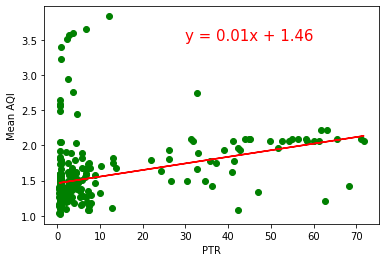

In [9]:
# Set values to plot and type for linear regression
x_values = bycity_summary_df["PTR"]
x_values = x_values.astype('float32')
y_values = bycity_summary_df["Mean AQI"]
y_values = y_values.astype('float32')

# Standard regression programming. X and Y 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
# Format
plt.annotate(line_eq,(30,3.5),fontsize=15,color="red")
plt.ylabel('Mean AQI')
plt.xlabel('PTR')

# Save image to file
#plt.savefig("../Images/NH Humidity and Latitude Regression.png")

print(f"The r-value is: {rvalue}")

In [11]:
#Sort 
bycity_top5_df = bycity_summary_df.sort_values("Mean AQI", ascending=False)
#Display first 5 rows
bycity_top5_df.iloc[0:10,:]

,Mean AQI,PTR
City,,
Los Angeles,3.836442,12.176151
E RNCHO DMNGZ,3.648494,6.627432
Santa Monica,3.602582,3.566043
Artesia,3.571019,2.636384
Hacienda Heights,3.515065,2.200715
Palos Verdes Peninsula,3.401722,0.796766
HUNTINGTN BCH,3.225251,0.780783
Placentia,2.938307,2.584794
San Diego,2.766141,3.654742


In [13]:
#Sort 
bycity_bottom5_df = bycity_summary_df.sort_values("Mean AQI", ascending=True)
#Display first 5 rows
bycity_bottom5_df.iloc[0:10,:]

,Mean AQI,PTR
City,,
Cayey,1.027260,0.743645
Coeur d'Alene,1.037303,0.506058
Bend,1.060258,0.658600
Southeast Washington,1.086083,42.397016
Issaquah,1.087518,7.319397
Garrison,1.088953,7.292003
Oxford,1.101865,2.030596
Bristol,1.106169,0.658909
Hazard,1.107604,12.789293
